In [201]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Initial Exploration

<AxesSubplot:>

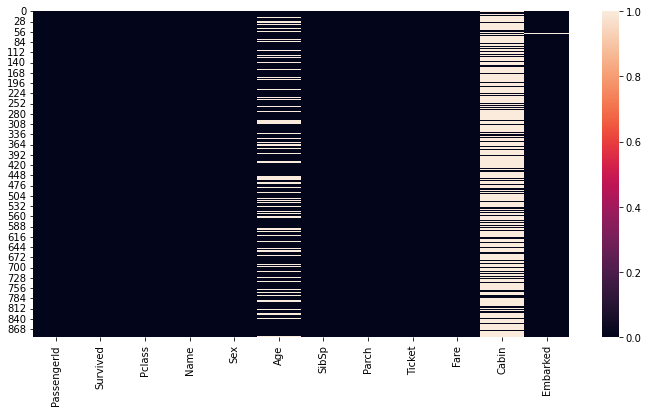

In [202]:
sns.heatmap(df.isna())

In [203]:
# Drop Cabin - too many missing values (+ Name)
df = df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis = 1)

In [204]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [205]:
# Imputation - replace 2 Nan values in Embarked by most frequent
import sklearn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = pd.DataFrame(imputer.fit_transform(df[['Embarked']]))
df['Embarked'].isna().any()


False

In [206]:
X = df.drop(['Survived'], axis = 1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [207]:
y = df['Survived']
y


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Split Data

In [208]:
import sklearn
from sklearn.model_selection import train_test_split

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,y_train.shape

((712, 7), (712,))

In [210]:
X_test.shape, y_test.shape

((179, 7), (179,))

### Exploration on X_Train

<AxesSubplot:>

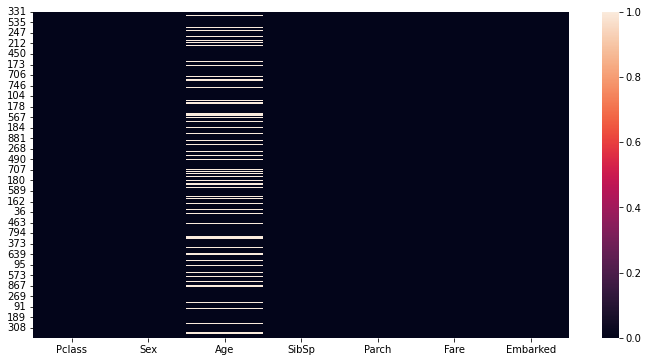

In [211]:
sns.heatmap(X_train.isna())

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

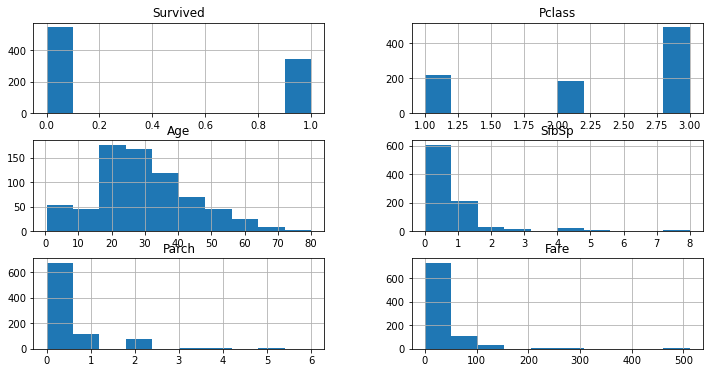

In [212]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
df.hist()

In [213]:
# Age has many missing values - due to skewed distibution, strategy - replace with Median
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())
X_train['Age'].isna().sum()

0

<AxesSubplot:>

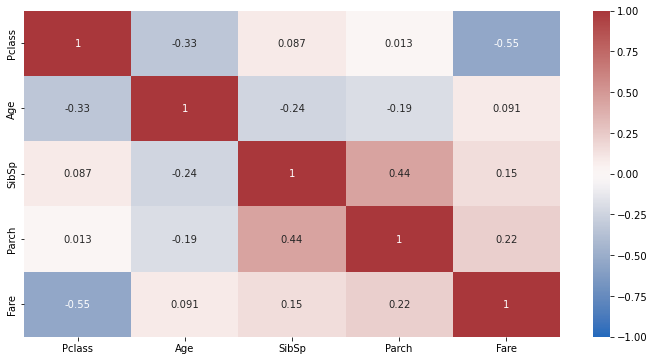

In [214]:
sns.heatmap(X_train.corr(),annot=True,vmax=1,vmin=-1,cmap="vlag",annot_kws={"size":10})

In [215]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.330056,29.204129,0.553371,0.379213,32.586276
std,0.824584,13.007971,1.176404,0.791669,51.969529
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.925000
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,30.500000
max,3.000000,80.000000,8.000000,6.000000,512.329200


Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

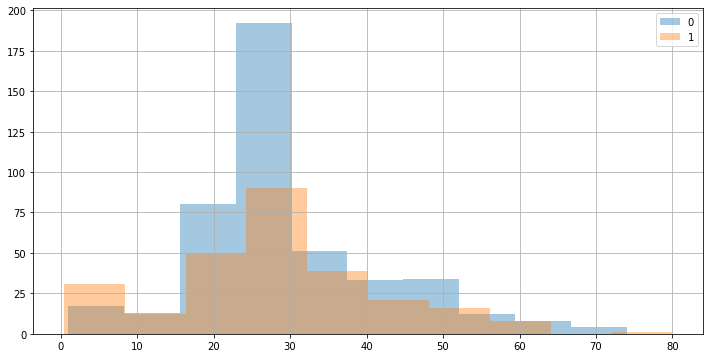

In [216]:
X_train['Age'].groupby(y_train).hist(alpha=0.4, legend=True)

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Sex, dtype: object

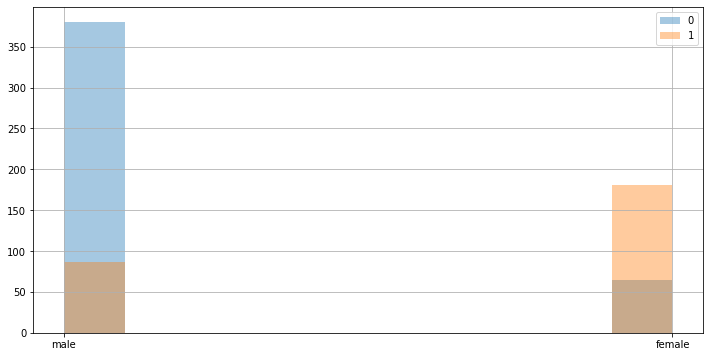

In [217]:
X_train['Sex'].groupby(y_train).hist(alpha=0.4, legend=True)

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

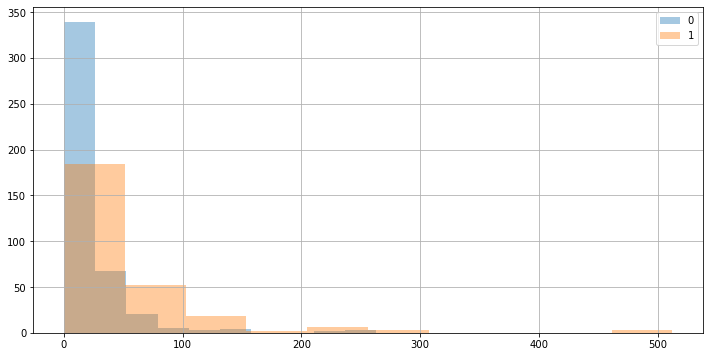

In [218]:
X_train['Fare'].groupby(y_train).hist(alpha=0.4, legend=True)

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Pclass, dtype: object

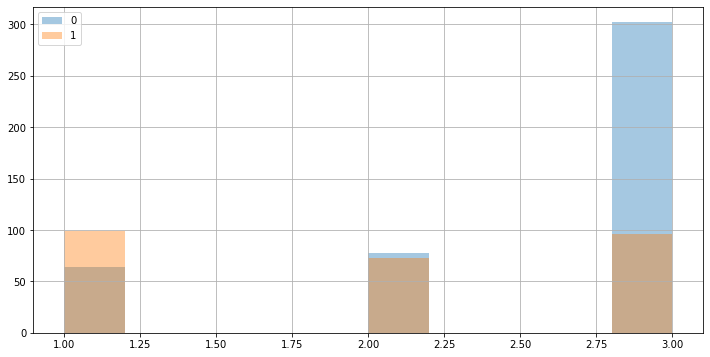

In [219]:
X_train['Pclass'].groupby(y_train).hist(alpha=0.4, legend=True)

### F.E - Scaling, Numerics

In [221]:
# Scalling - Fare
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train[['Fare']])
X_train[['Fare']] = scaler.transform(X_train[['Fare']])


In [222]:
# Binning Age
from sklearn.preprocessing import KBinsDiscretizer

kbins = KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='quantile')
kbins.fit(X_train[['Age']])
t = kbins.transform(X_train[['Age']])

edges = kbins.bin_edges_[0].round(1)
labels = []

for i in range(len(edges)-1):
    edge1 = edges[i]
    edge2 = edges[i+1]
    labels.append(f"Age_{edge1}_to_{edge2}")

df_bins = pd.DataFrame(t, columns=labels, index=X_train.index)
df_bins


C:\Users\maisa\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


,Age_0.4_to_21.0,Age_21.0_to_28.0,Age_28.0_to_38.0,Age_38.0_to_80.0
331,0.0,0.0,0.0,1.0
733,0.0,1.0,0.0,0.0
382,0.0,0.0,1.0,0.0
704,0.0,1.0,0.0,0.0
813,1.0,0.0,0.0,0.0
...,...,...,...,...
106,0.0,1.0,0.0,0.0
270,0.0,0.0,1.0,0.0
860,0.0,0.0,0.0,1.0
435,1.0,0.0,0.0,0.0


In [223]:
X_train = pd.concat([X_train, df_bins], axis=1)
X_train = X_train.drop(['Age'], axis = 1)

X_train

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_0.4_to_21.0,Age_21.0_to_28.0,Age_28.0_to_38.0,Age_38.0_to_80.0
331,1,male,0,0,0.055628,S,0.0,0.0,0.0,1.0
733,2,male,0,0,0.025374,S,0.0,1.0,0.0,0.0
382,3,male,0,0,0.015469,S,0.0,0.0,1.0,0.0
704,3,male,1,0,0.015330,S,0.0,1.0,0.0,0.0
813,3,female,4,2,0.061045,S,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
106,3,female,0,0,0.014932,S,0.0,1.0,0.0,0.0
270,1,male,0,0,0.060508,S,0.0,0.0,1.0,0.0
860,3,male,2,0,0.027538,S,0.0,0.0,0.0,1.0
435,1,female,1,2,0.234224,S,1.0,0.0,0.0,0.0


### One Hot Encoding

In [224]:
# one hot encoding for - Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
categorical = X_train[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
categorical.shape

(712, 5)

In [225]:
from sklearn.preprocessing import OneHotEncoder

ohc = OneHotEncoder(sparse=False, handle_unknown='ignore')  #instantioation
ohc.fit(categorical)            # learn the classes
m = ohc.transform(categorical)  # result is a numpy array
m[:5]

array([[1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1.]])

In [226]:
cat_transformed = pd.DataFrame(m, columns=['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], index=categorical.index)
cat_transformed.head()


,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
331,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
733,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
382,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
704,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
813,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [227]:
X_train_transformed = pd.concat([X_train, cat_transformed], axis=1)
X_train_transformed.columns


Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Age_0.4_to_21.0', 'Age_21.0_to_28.0', 'Age_28.0_to_38.0',
       'Age_38.0_to_80.0', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [228]:
# drop old columns
X_train_transformed = X_train_transformed.drop(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], axis = 1)
X_train_transformed.columns

Index(['Fare', 'Age_0.4_to_21.0', 'Age_21.0_to_28.0', 'Age_28.0_to_38.0',
       'Age_38.0_to_80.0', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [231]:
X_train_transformed.shape

(712, 27)

### Train model

In [232]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression(max_iter=300)
m.fit(X_train_transformed, y_train) 


LogisticRegression(max_iter=300)

In [233]:
m.score(X_train_transformed, y_train)  # Check score for Training Data

0.8075842696629213

In [234]:
m.coef_, m.intercept_  

(array([[ 0.57030883,  0.43343023,  0.09207326, -0.09699006, -0.4283083 ,
          0.77644767,  0.18151302, -0.95775556,  1.30057514, -1.30037001,
          0.74191301,  0.76353185,  0.57313398, -0.65138613, -0.187972  ,
         -0.51611338, -0.7229022 ,  0.24282437,  0.70069851,  0.14448301,
          0.58097136, -0.73206857, -0.59407592, -0.34262764,  0.19188064,
          0.11073325, -0.30240876]]),
 array([-0.74111218]))

In [235]:
m.predict_proba(X_train_transformed)

array([[0.7269671 , 0.2730329 ],
       [0.74480531, 0.25519469],
       [0.91721366, 0.08278634],
       ...,
       [0.94776192, 0.05223808],
       [0.07526255, 0.92473745],
       [0.48668427, 0.51331573]])

### Set up Pipeline (See Script File), apply transformation on Test-Set